## Criacao dataset

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import random

In [3]:
# import warnings
# warnings.filterwarnings("ignore")

# import pandas as pd
# import numpy as np
# import random

# # Configurar seed para reprodutibilidade
# np.random.seed(42)
# random.seed(42)

# # Gerar IDs de clientes
# num_clients = 25000
# client_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_clients + 1)]

# # Gerar dados
# dataset = {
#     "Client_ID": client_ids,
#     "Age": np.random.randint(18, 80, size=num_clients),
#     "Gender": np.random.choice(["Male", "Female"], size=num_clients),
#     "Account_Type": np.random.choice(["Savings", "Current", "Salary"], size=num_clients),
#     "Region": np.random.choice(["Midwest", "Northeast", "Southeast", "North", "South"], size=num_clients),
#     "Monthly_Income": np.random.randint(2000, 20000, size=num_clients),
#     "Account_Balance": np.random.randint(0, 100000, size=num_clients),
#     "Loan_Amount": np.random.choice([0] + list(range(5000, 50000, 5000)), size=num_clients),
#     "Loan_Default": np.random.choice([0, 1], size=num_clients, p=[0.7, 0.3]),  # 10% de inadimplência
#     "Transaction_Count": np.random.randint(5, 100, size=num_clients),
#     "Credit_Score": np.random.randint(0, 1000, size=num_clients),
# }

# # Criar o DataFrame
# df = pd.DataFrame(dataset)

# # # Salvar como CSV para futuras análises, se necessário
# # df.to_csv("bank_dataset.csv", index=False)

# # Mostrar uma amostra
# print("Exemplo do Dataset:")
# df.head()


In [4]:
# Configurar seed para reprodutibilidade
np.random.seed(42)
random.seed(42)

# Gerar IDs de clientes
num_clients = 250000
client_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_clients + 1)]

# Função para gerar dados ajustados
def generate_dataset(num_clients):
    # Idades distribuídas realisticamente
    age = np.random.choice(
        np.concatenate([np.random.randint(18, 25, size=num_clients // 5),
                        np.random.randint(25, 60, size=num_clients // 2),
                        np.random.randint(60, 80, size=num_clients // 5)]),
        size=num_clients, replace=True
    )

    # Gêneros (distribuição equilibrada)
    gender = np.random.choice(["Male", "Female"], size=num_clients)

    # Tipo de conta (ajuste baseado em mercado)
    account_type = np.random.choice(["Savings", "Current", "Salary"], size=num_clients, p=[0.4, 0.4, 0.2])

    # Regiões com peso ajustado
    region = np.random.choice(["Midwest", "Northeast", "Southeast", "North", "South"], size=num_clients, p=[0.2, 0.2, 0.2, 0.2, 0.2])

    # Renda mensal (ajustada por idade e gênero)
    monthly_income = np.where(
        age < 25, np.random.randint(2000, 8000, size=num_clients),
        np.where(
            age < 60, np.random.randint(5000, 20000, size=num_clients),
            np.random.randint(2000, 10000, size=num_clients)
        )
    )
    # Ajuste adicional para gênero (tendências do mercado)
    monthly_income += np.where(gender == "Male", np.random.randint(0, 3000, size=num_clients), -np.random.randint(0, 2000, size=num_clients))

    # Saldo da conta proporcional à renda
    account_balance = np.where(
        monthly_income > 10000, np.random.randint(5000, 100000, size=num_clients),
        np.random.randint(0, 50000, size=num_clients)
    )

    # Empréstimos ajustados por saldo e renda
    loan_amount = np.where(
        account_balance < 20000, np.random.choice([0, 5000, 10000, 15000], size=num_clients),
        np.random.choice([20000, 30000, 40000, 50000], size=num_clients)
    )

    # Default ajustado com base em renda e empréstimos
    loan_default = np.where(
        loan_amount > 30000, np.random.choice([0, 1], size=num_clients, p=[0.5, 0.5]),
        np.random.choice([0, 1], size=num_clients, p=[0.8, 0.2])
    )

    # Número de transações ajustado com base no tipo de conta
    transaction_count = np.where(
        account_type == "Salary", np.random.randint(50, 100, size=num_clients),
        np.random.randint(5, 50, size=num_clients)
    )

    # Score de crédito ajustado
    credit_score = np.where(
        loan_default == 1, np.random.randint(300, 600, size=num_clients),
        np.random.randint(600, 850, size=num_clients)
    )

    # Retornar o dataset ajustado
    dataset = {
        "Client_ID": client_ids,
        "Age": age,
        "Gender": gender,
        "Account_Type": account_type,
        "Region": region,
        "Monthly_Income": monthly_income,
        "Account_Balance": account_balance,
        "Loan_Amount": loan_amount,
        "Loan_Default": loan_default,
        "Transaction_Count": transaction_count,
        "Credit_Score": credit_score,
    }
    return dataset

# Gerar dados ajustados
dataset = generate_dataset(num_clients)

# Criar o DataFrame
df = pd.DataFrame(dataset)

# Mostrar uma amostra
print("Exemplo do Dataset:")
df.head()


Exemplo do Dataset:


,Client_ID,Age,Gender,Account_Type,Region,Monthly_Income,Account_Balance,Loan_Amount,Loan_Default,Transaction_Count,Credit_Score
0,C0001,24,Male,Savings,South,9135,38153,50000,1,27,440
1,C0002,48,Female,Savings,North,14998,75655,50000,1,43,407
2,C0003,65,Female,Savings,Southeast,6316,13911,5000,0,35,670
3,C0004,52,Male,Salary,Southeast,9807,38386,20000,1,81,310
4,C0005,74,Female,Current,North,5324,49189,20000,1,47,537


## Descrição das Colunas

- **Client_ID**: Identificador único do cliente  
- **Age**: Idade do cliente  
- **Gender**: Gênero do cliente  
- **Account_Type**: Tipo de conta (Poupança, Corrente, Salário)  
- **Region**: Região onde o cliente está localizado  
- **Monthly_Income**: Renda mensal do cliente (em BRL)  
- **Account_Balance**: Saldo atual da conta (em BRL)  
- **Loan_Amount**: Valor do empréstimo (em BRL)  
- **Loan_Default**: Indicador de inadimplência (0 = não, 1 = sim)  
- **Transaction_Count**: Número de transações realizadas no último mês  
- **Credit_Score**: Pontuação de crédito (300-850)  



_____________________

## EDA

In [8]:
# Estatísticas descritivas
print("Qtde de linhas e quantidade de colunas:")
df.shape

Qtde de linhas e quantidade de colunas:


(250000, 11)

In [9]:
# Estatísticas descritivas
print("Resumo estatístico do dataset:")
df.describe()


Resumo estatístico do dataset:


,Age,Monthly_Income,Account_Balance,Loan_Amount,Loan_Default,Transaction_Count,Credit_Score
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,43.461792,9647.401364,36066.091152,26671.040000,0.305392,36.483536,640.435360
std,18.133063,5153.198245,24681.719970,15987.796839,0.460574,23.174801,148.052402
min,18.000000,11.000000,0.000000,0.000000,0.000000,5.000000,300.000000
25%,26.000000,5633.000000,16743.000000,15000.000000,0.000000,19.000000,545.000000
50%,42.000000,8570.000000,32163.000000,30000.000000,0.000000,33.000000,669.000000
75%,58.000000,13509.000000,47667.250000,40000.000000,1.000000,47.000000,759.000000
max,79.000000,22981.000000,99999.000000,50000.000000,1.000000,99.000000,849.000000


In [10]:
# Estatísticas descritivas
print("Valores ausentes por coluna:")
df.isnull().sum()

Valores ausentes por coluna:


Client_ID            0
Age                  0
Gender               0
Account_Type         0
Region               0
Monthly_Income       0
Account_Balance      0
Loan_Amount          0
Loan_Default         0
Transaction_Count    0
Credit_Score         0
dtype: int64

In [11]:
# Estatísticas descritivas
print("Verificacao de tipos de dados:")
df.dtypes

Verificacao de tipos de dados:


Client_ID            object
Age                   int64
Gender               object
Account_Type         object
Region               object
Monthly_Income        int64
Account_Balance       int64
Loan_Amount           int64
Loan_Default          int64
Transaction_Count     int64
Credit_Score          int64
dtype: object

In [12]:
# Estatísticas descritivas
print("Verificacao de variaveis categoricas:")
df["Gender"].value_counts()

Verificacao de variaveis categoricas:


Gender
Male      125178
Female    124822
Name: count, dtype: int64

In [13]:
# Estatísticas descritivas
print("Verificacao de variaveis categoricas:")
df["Account_Type"].value_counts()

Verificacao de variaveis categoricas:


Account_Type
Current    100099
Savings     99875
Salary      50026
Name: count, dtype: int64

In [14]:
# Estatísticas descritivas
print("Verificacao de variaveis categoricas:")
df["Region"].value_counts()

Verificacao de variaveis categoricas:


Region
South        50174
North        50031
Northeast    49987
Midwest      49947
Southeast    49861
Name: count, dtype: int64

#### Distribuição de Variáveis Numéricas

##### Correlação entre Variáveis

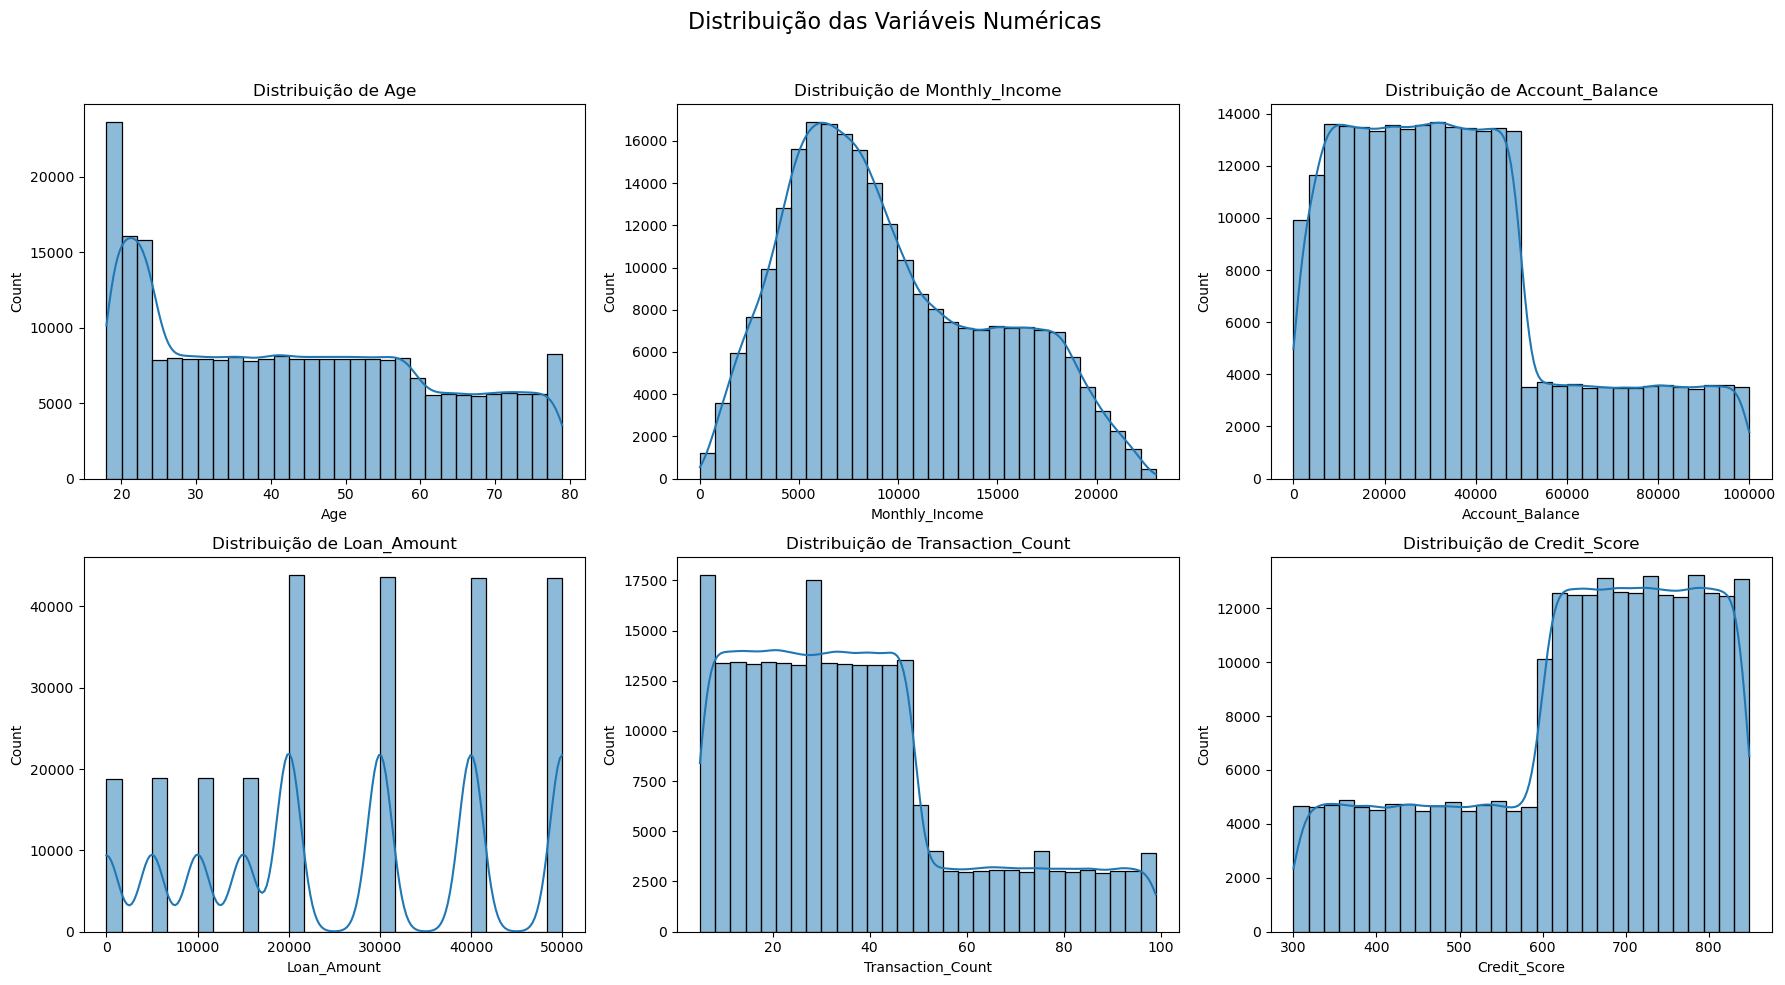

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de variáveis numéricas
numeric_columns = ["Age", "Monthly_Income", "Account_Balance", "Loan_Amount", "Transaction_Count", "Credit_Score"]

# Configurar o layout dos subplots (2 linhas x 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 linhas, 3 colunas
fig.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)

# Iterar sobre as colunas e os eixos
for i, col in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]  # Acessar o subplot correto
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.set_title(f"Distribuição de {col}")

# Ajustar espaçamento entre os gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta para não sobrepor o título principal
plt.show()


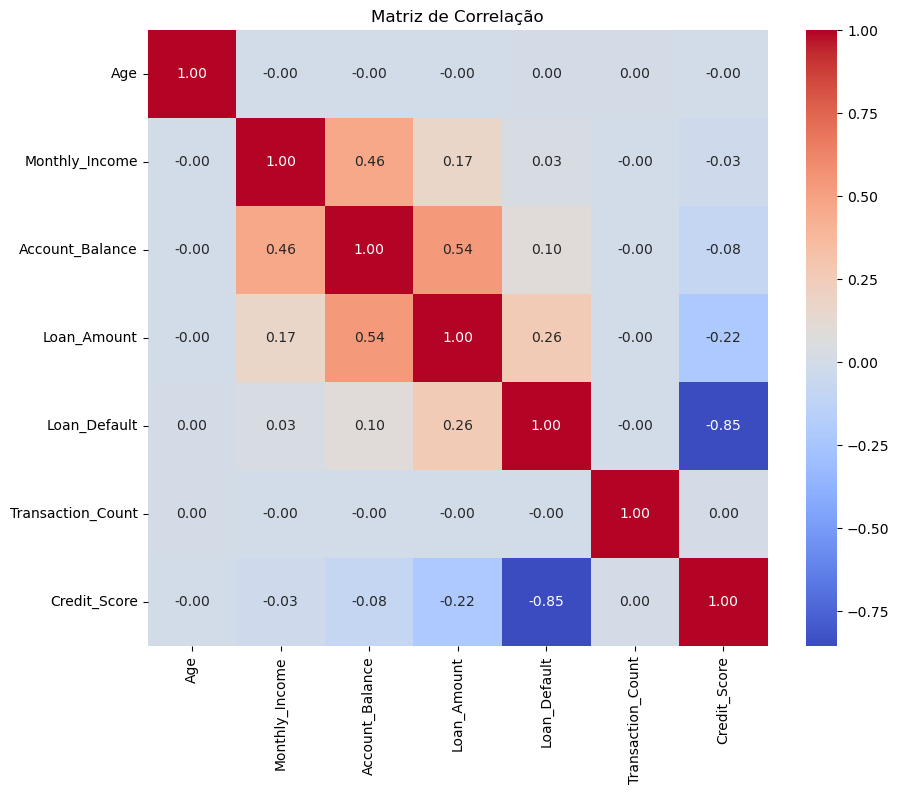

In [18]:
# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=["float64", "int64"])

# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()



#### Comparação entre Variáveis Categóricas e Numéricas

#### Renda por Gênero

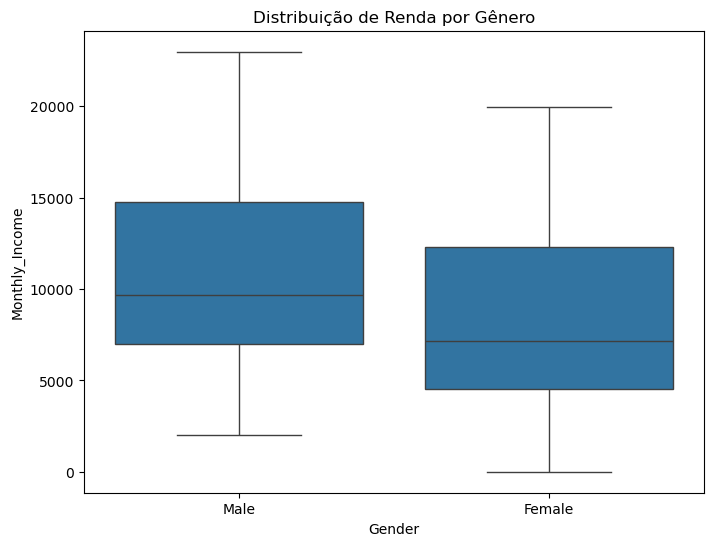

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="Monthly_Income")
plt.title("Distribuição de Renda por Gênero")
plt.show()


#### Saldo por Tipo de Conta

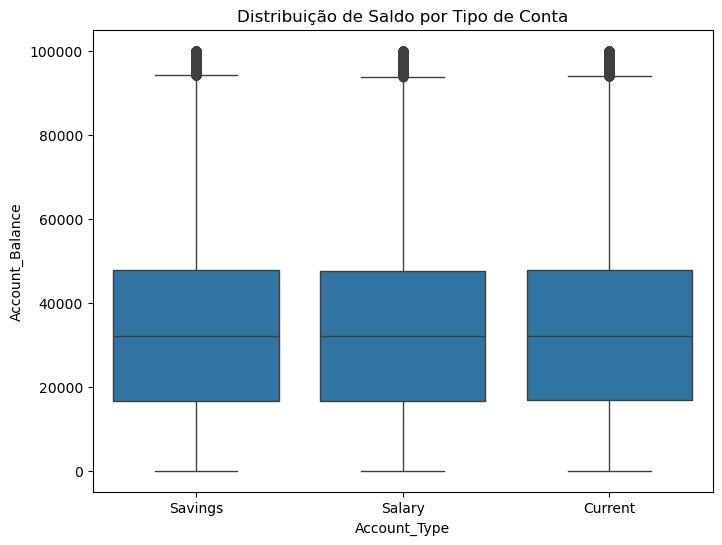

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Account_Type", y="Account_Balance")
plt.title("Distribuição de Saldo por Tipo de Conta")
plt.show()


#### Análise de Outliers

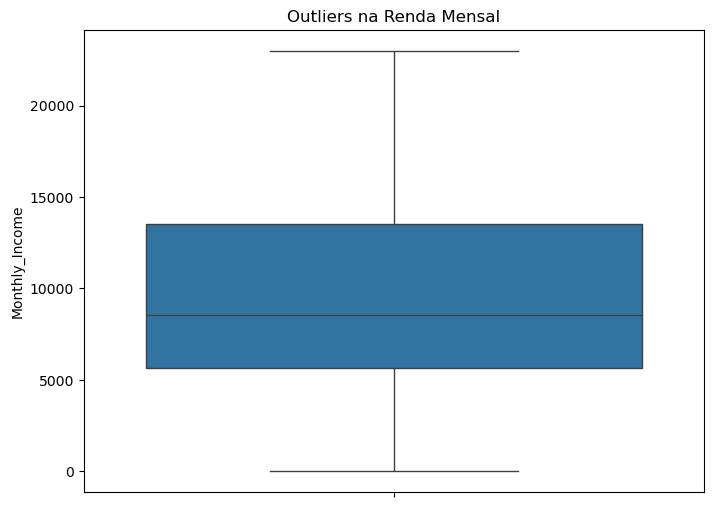

In [25]:
# Identificar outliers em renda mensal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="Monthly_Income")
plt.title("Outliers na Renda Mensal")
plt.show()


#### Clientes Inadimplentes

Proporção de inadimplentes:
Loan_Default
0    0.694608
1    0.305392
Name: proportion, dtype: float64


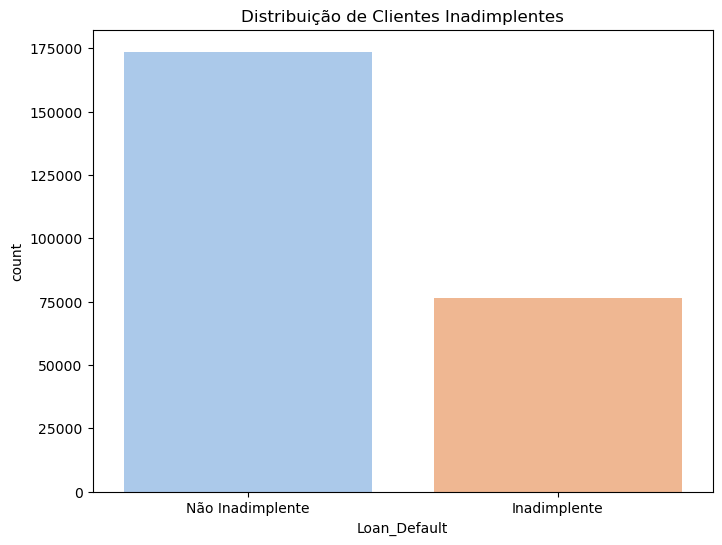

In [27]:
# Proporção de clientes inadimplentes
print("Proporção de inadimplentes:")
print(df["Loan_Default"].value_counts(normalize=True))

# Comparação entre inadimplentes e não inadimplentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Loan_Default", palette="pastel")
plt.title("Distribuição de Clientes Inadimplentes")
plt.xticks([0, 1], ["Não Inadimplente", "Inadimplente"])
plt.show()


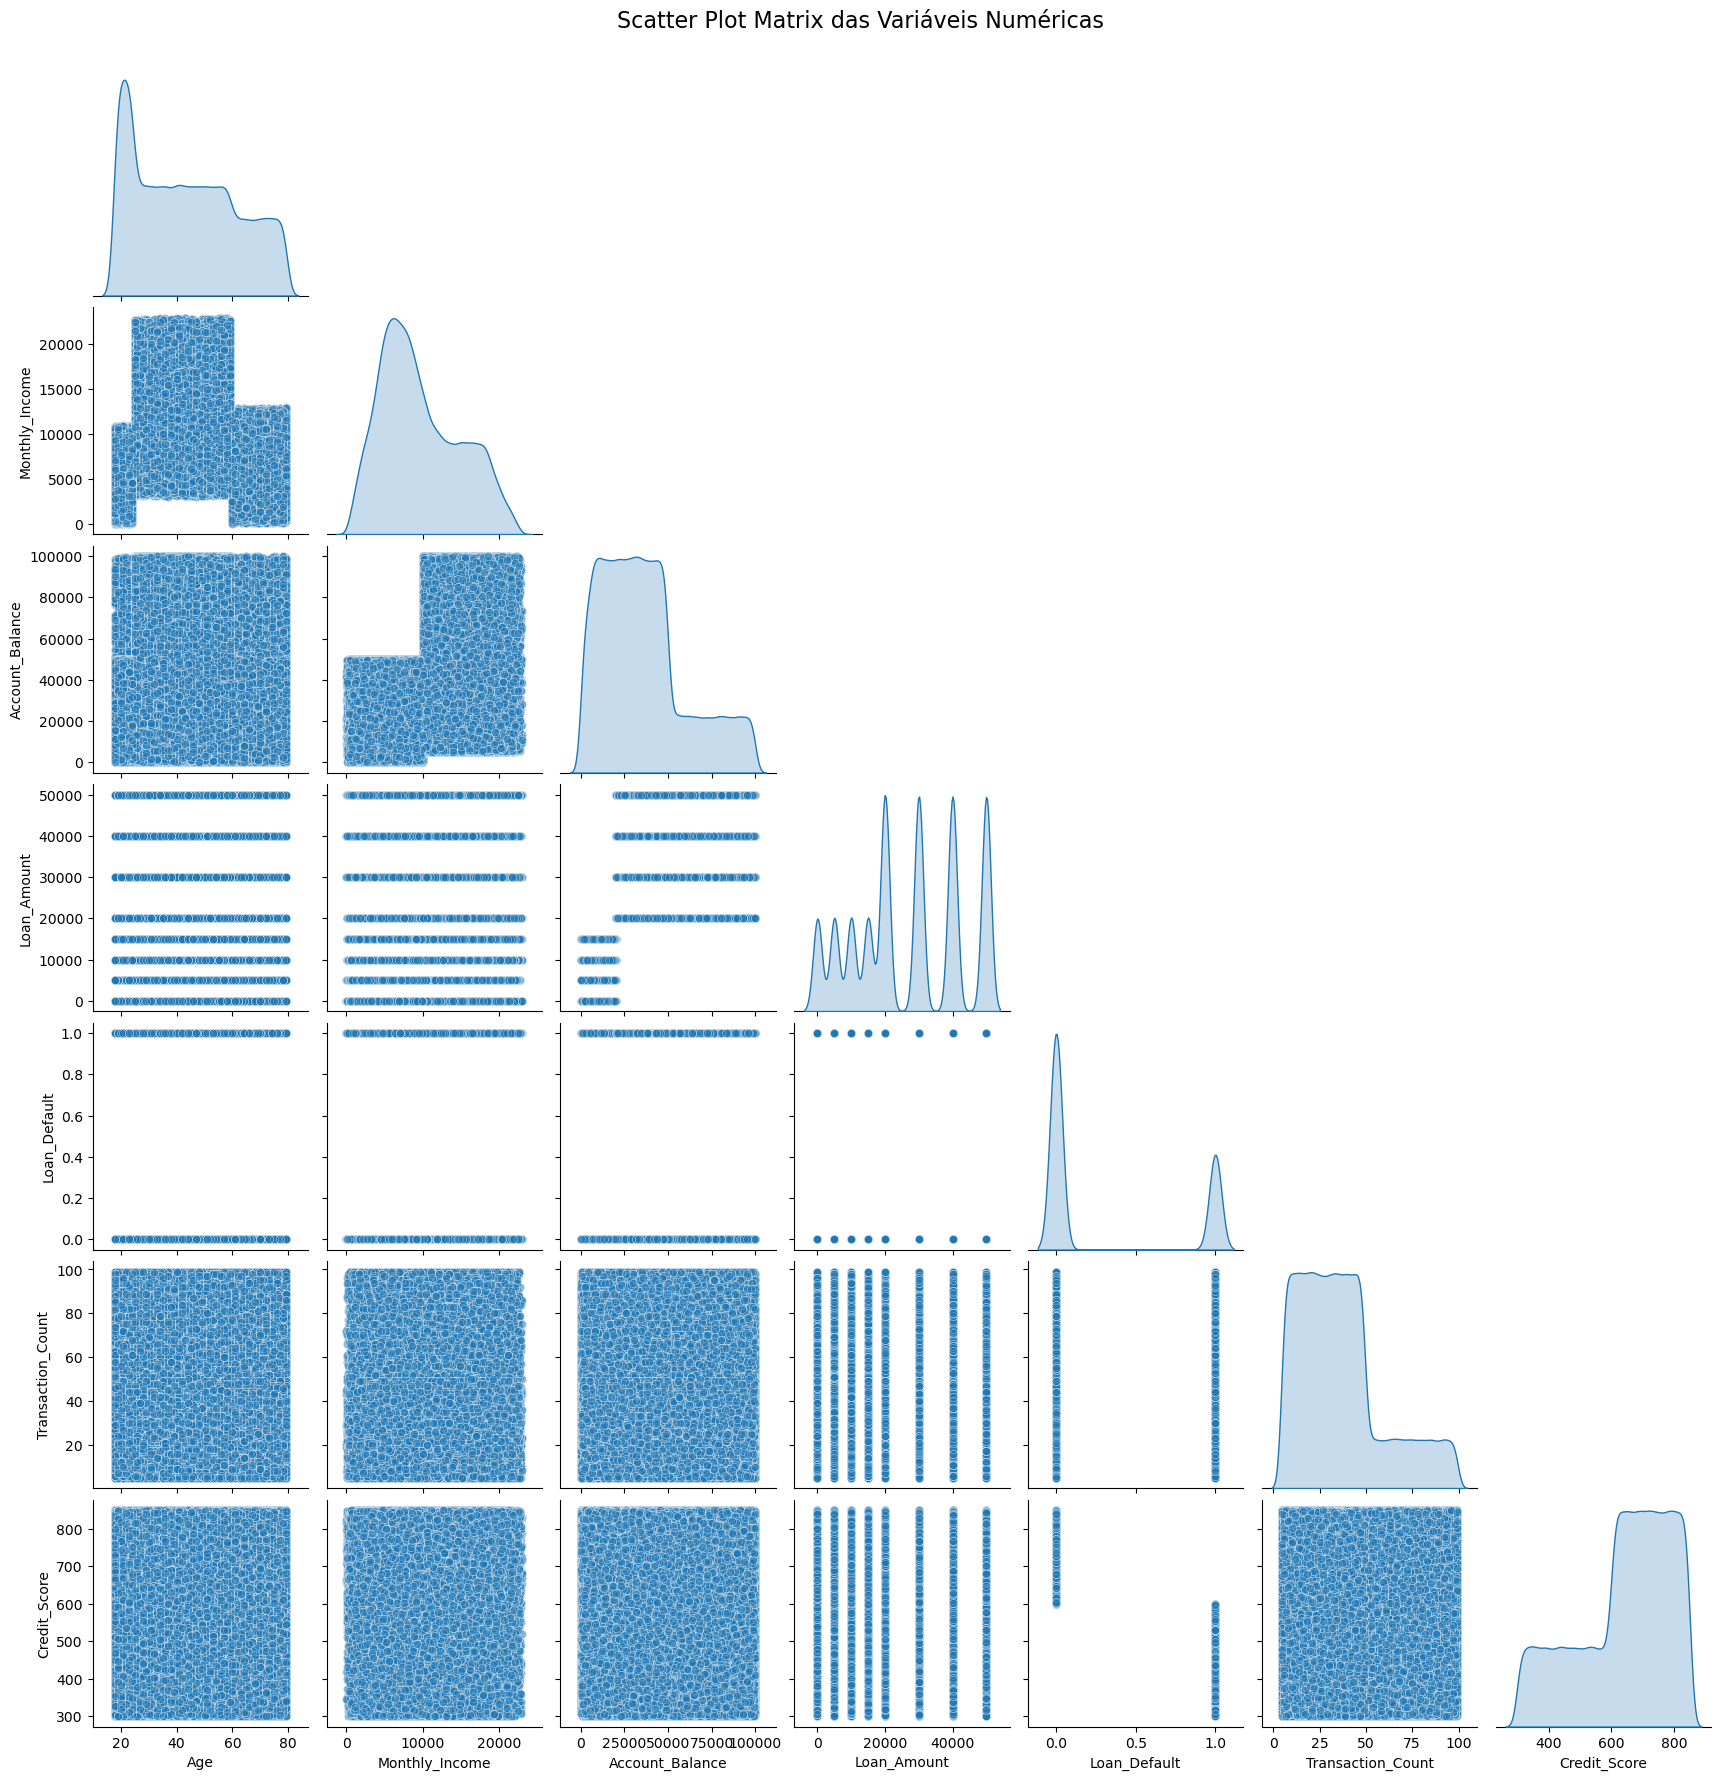

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=["float64", "int64"])

# Criar um scatter plot matrix
sns.pairplot(numeric_columns, diag_kind="kde", corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Scatter Plot Matrix das Variáveis Numéricas", y=1.02, fontsize=16)
plt.show()


_______________

## Analises

### Análise de Renda e Saldo

Existe uma correlação entre a renda mensal e o saldo da conta?

In [33]:
correlation = df["Monthly_Income"].corr(df["Account_Balance"])

In [34]:
correlation

0.4645214798973542

Correlação

    O valor da correlação entre Monthly_Income (Renda Mensal) e Account_Balance (Saldo da Conta) é 0.02, o que indica uma correlação muito fraca entre as duas variáveis. Isso sugere que não há uma relação linear significativa entre a renda mensal dos clientes e o saldo que eles mantêm em suas contas.

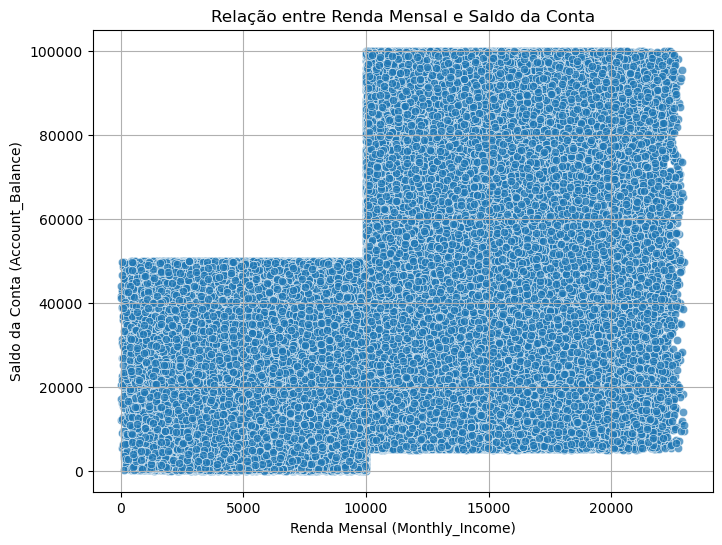

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Monthly_Income", y="Account_Balance", alpha=0.7)
plt.title("Relação entre Renda Mensal e Saldo da Conta")
plt.xlabel("Renda Mensal (Monthly_Income)")
plt.ylabel("Saldo da Conta (Account_Balance)")
plt.grid(True)
plt.show()


### Perfil dos Inadimplentes

Qual é o perfil típico dos clientes inadimplentes?

In [39]:
# Filtrar clientes inadimplentes e não inadimplentes
inadimplentes = df[df["Loan_Default"] == 1]
nao_inadimplentes = df[df["Loan_Default"] == 0]


In [40]:
# Calcular métricas para inadimplentes
inadimplentes_metrics = {
    "Idade Média": inadimplentes["Age"].mean(),
    "Renda Mensal Média": inadimplentes["Monthly_Income"].mean(),
    "Pontuação de Crédito Média": inadimplentes["Credit_Score"].mean()
}

# Calcular métricas para não inadimplentes
nao_inadimplentes_metrics = {
    "Idade Média": nao_inadimplentes["Age"].mean(),
    "Renda Mensal Média": nao_inadimplentes["Monthly_Income"].mean(),
    "Pontuação de Crédito Média": nao_inadimplentes["Credit_Score"].mean()
}

# Exibir resultados
print("Métricas dos Inadimplentes:")
print(inadimplentes_metrics)

print("\nMétricas dos Não Inadimplentes:")
print(nao_inadimplentes_metrics)


Métricas dos Inadimplentes:
{'Idade Média': 43.4778383192749, 'Renda Mensal Média': 9895.89830774873, 'Pontuação de Crédito Média': 449.54742756850214}

Métricas dos Não Inadimplentes:
{'Idade Média': 43.45473706032755, 'Renda Mensal Média': 9538.146966346487, 'Pontuação de Crédito Média': 724.3613261004768}


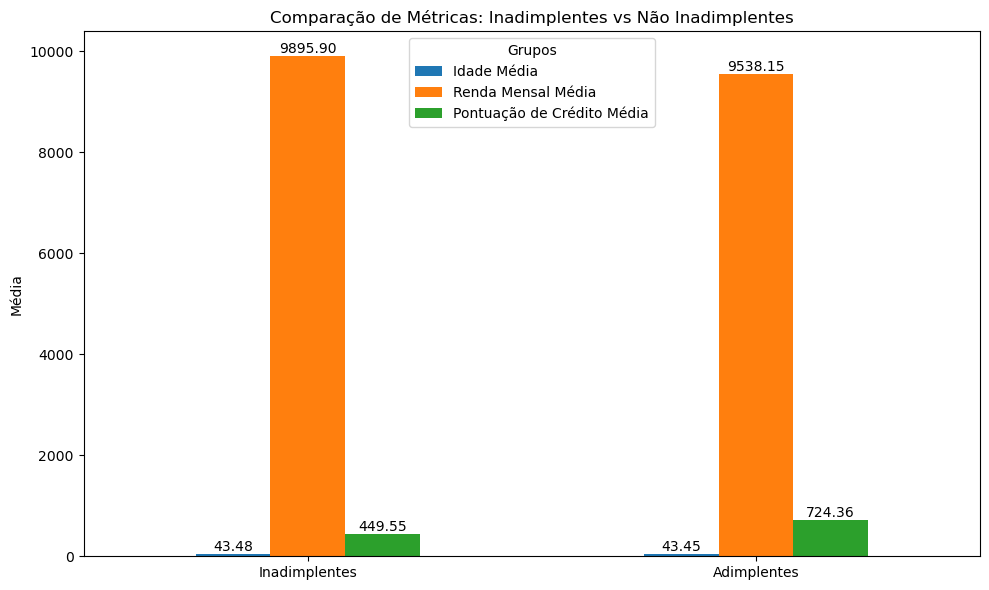

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar DataFrame com as métricas
comparacao = pd.DataFrame({
    "Inadimplentes": inadimplentes_metrics,
    "Adimplentes": nao_inadimplentes_metrics
})

# Transpor o DataFrame para facilitar o gráfico
comparacao = comparacao.T

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars = comparacao.plot(kind="bar", ax=ax, legend=True, rot=0)

# Adicionar rótulos de dados em cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

# Configurações do gráfico
plt.title("Comparação de Métricas: Inadimplentes vs Não Inadimplentes")
plt.ylabel("Média")
plt.xticks(rotation=0)
plt.legend(title="Grupos")
plt.grid(axis="y", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()



### Distribuição por Região

Qual é a distribuição dos tipos de contas (Account_Type) por região?

In [44]:
# Criar tabela cruzada
tabela_regiao_conta = pd.crosstab(df["Region"], df["Account_Type"])

# Exibir a tabela cruzada
print("Tabela Cruzada: Tipos de Contas por Região")
print(tabela_regiao_conta)


Tabela Cruzada: Tipos de Contas por Região
Account_Type  Current  Salary  Savings
Region                                
Midwest         20052   10016    19879
North           20094   10019    19918
Northeast       19992   10013    19982
South           20086    9998    20090
Southeast       19875    9980    20006


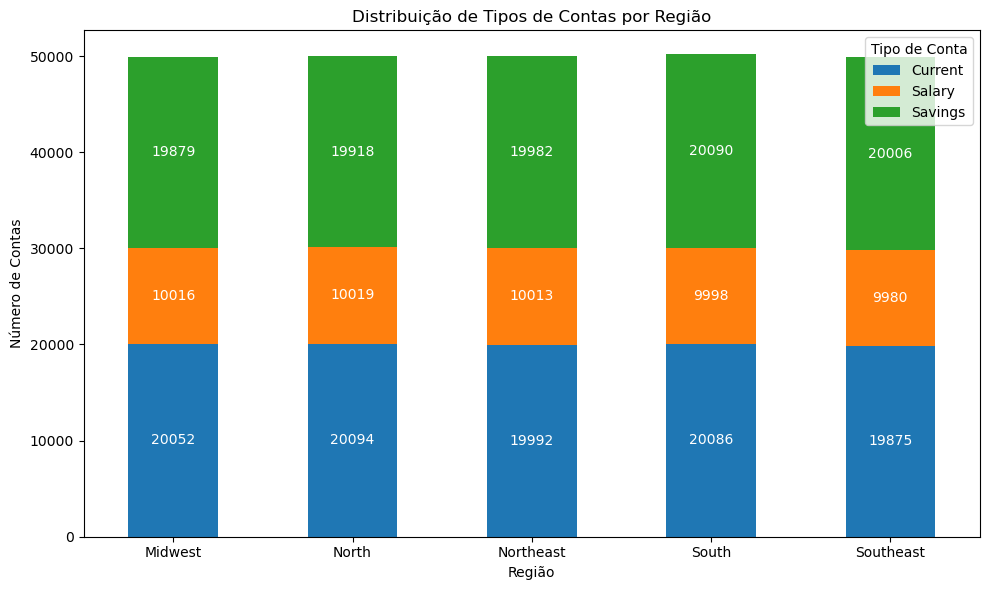

In [45]:
import matplotlib.pyplot as plt

# Criar gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))
cores = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Definir cores
tabela_regiao_conta.plot(kind="bar", stacked=True, ax=ax, color=cores)

# Adicionar rótulos de dados
for container in ax.containers:
    # Adiciona o valor acima de cada barra
    ax.bar_label(container, fmt="%.0f", label_type="center", fontsize=10, color="white")

# Configurar o gráfico
plt.title("Distribuição de Tipos de Contas por Região")
plt.xlabel("Região")
plt.ylabel("Número de Contas")
plt.xticks(rotation=0)
plt.legend(title="Tipo de Conta")
plt.grid(axis="y", linestyle="", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()




### Score de Crédito e Comportamento

Como o número de transações e o saldo influenciam o score de crédito?

In [48]:
# Categorizar os clientes com base no Credit_Score
score_bins = [0, 299, 579, 669, 739, 850]  # Faixas mais realistas baseadas em padrões de crédito
score_labels = ["Muito Baixo", "Baixo", "Médio", "Bom", "Excelente"]

# Categorizar com pd.cut
df["Credit_Score_Category"] = pd.cut(df["Credit_Score"], bins=score_bins, labels=score_labels, right=True, include_lowest=True)

# Exibir a distribuição de clientes por categoria
print("Distribuição de clientes por categoria de score:")
print(df["Credit_Score_Category"].value_counts())



Distribuição de clientes por categoria de score:
Credit_Score_Category
Excelente      76251
Baixo          71214
Médio          53861
Bom            48674
Muito Baixo        0
Name: count, dtype: int64


In [49]:
# Calcular as médias de Transaction_Count e Account_Balance por categoria
credit_score_analysis = df.groupby("Credit_Score_Category")[["Transaction_Count", "Account_Balance"]].mean()

# Exibir o resultado
print("Médias de Transações e Saldo por Categoria de Score de Crédito:")
print(credit_score_analysis)


Médias de Transações e Saldo por Categoria de Score de Crédito:
                       Transaction_Count  Account_Balance
Credit_Score_Category                                    
Muito Baixo                          NaN              NaN
Baixo                          36.450543     39814.795391
Médio                          36.278105     34828.172277
Bom                            36.606299     34488.681925
Excelente                      36.581094     34446.363431


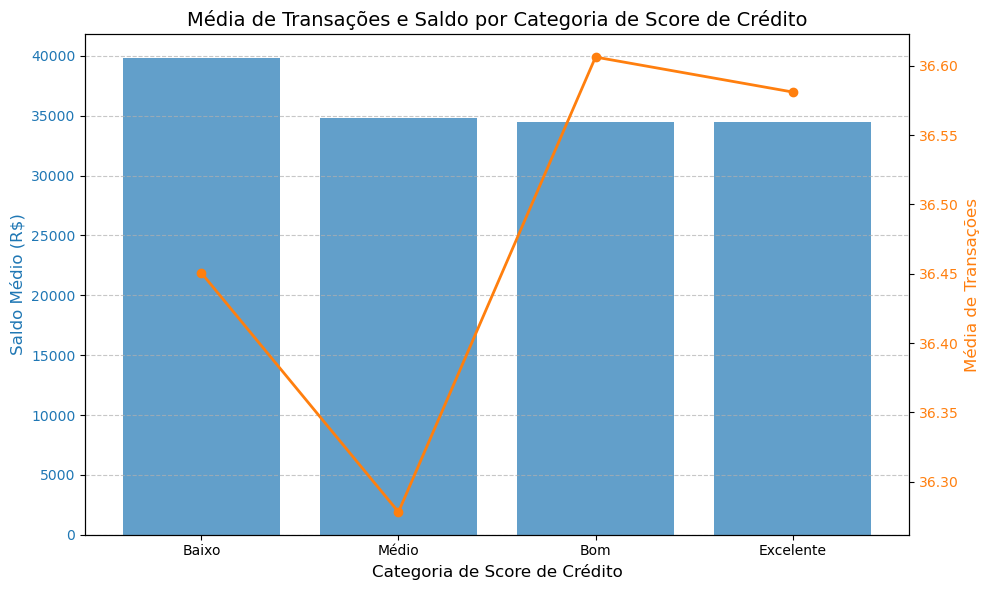

In [50]:
import matplotlib.pyplot as plt

# Plotar as médias com eixo secundário para Transaction_Count
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot para Saldo Médio no eixo principal
color_balance = "#1f77b4"
ax1.bar(credit_score_analysis.index, credit_score_analysis["Account_Balance"], color=color_balance, alpha=0.7)
ax1.set_ylabel("Saldo Médio (R$)", fontsize=12, color=color_balance)
ax1.tick_params(axis="y", labelcolor=color_balance)
ax1.set_xlabel("Categoria de Score de Crédito", fontsize=12)
ax1.set_title("Média de Transações e Saldo por Categoria de Score de Crédito", fontsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Plot para Número de Transações no eixo secundário
ax2 = ax1.twinx()
color_transactions = "#ff7f0e"
ax2.plot(credit_score_analysis.index, credit_score_analysis["Transaction_Count"], color=color_transactions, marker="o", linewidth=2)
ax2.set_ylabel("Média de Transações", fontsize=12, color=color_transactions)
ax2.tick_params(axis="y", labelcolor=color_transactions)

# Ajustar layout
plt.tight_layout()
plt.show()


### Renda e Tipo de Conta

Clientes com diferentes tipos de contas possuem rendas significativamente diferentes?

In [53]:
# Calcular a renda média por tipo de conta
media_renda = df.groupby("Account_Type")["Monthly_Income"].mean()

# Exibir as médias
print("Média de Renda por Tipo de Conta:")
print(media_renda)


Média de Renda por Tipo de Conta:
Account_Type
Current    9656.547338
Salary     9653.855635
Savings    9635.002023
Name: Monthly_Income, dtype: float64


O teste ANOVA avalia se há diferenças significativas entre as médias de mais de dois grupos. Para isso, utilizamos o f_oneway do módulo scipy.stats.

In [55]:
from scipy.stats import f_oneway

# Separar as rendas por tipo de conta
renda_savings = df[df["Account_Type"] == "Savings"]["Monthly_Income"]
renda_current = df[df["Account_Type"] == "Current"]["Monthly_Income"]
renda_salary = df[df["Account_Type"] == "Salary"]["Monthly_Income"]

# Realizar o teste ANOVA
anova_result = f_oneway(renda_savings, renda_current, renda_salary)

# Exibir o resultado
print("Resultado do Teste ANOVA:")
print(f"F-Estatística: {anova_result.statistic:.2f}")
print(f"p-valor: {anova_result.pvalue:.4f}")


Resultado do Teste ANOVA:
F-Estatística: 0.49
p-valor: 0.6151


Resultado do Teste

    F-Estatística: 0.46
        Um valor baixo da F-Estatística indica que a variabilidade entre os grupos não é significativamente maior que a variabilidade dentro dos grupos.

    p-valor: 0.6296
        Como o p-valor é maior que 0.05, não rejeitamos a hipótese nula. Isso significa que não há evidência estatística suficiente para afirmar que a renda média difere significativamente entre os tipos de contas.

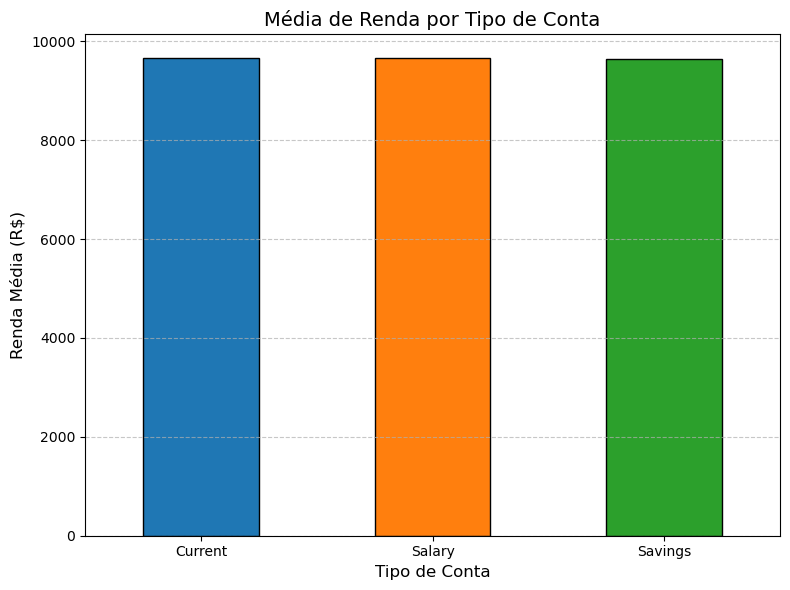

In [57]:
import matplotlib.pyplot as plt

# Plotar as médias de renda por tipo de conta
media_renda.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"], figsize=(8, 6), edgecolor="black")

# Configurar o gráfico
plt.title("Média de Renda por Tipo de Conta", fontsize=14)
plt.xlabel("Tipo de Conta", fontsize=12)
plt.ylabel("Renda Média (R$)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Análise de Transações

Qual é o número médio de transações por faixa etária?

In [60]:
# Criar faixas etárias
faixas_etarias = [18, 25, 35, 50, 80]
labels_etarias = ["18-25", "26-35", "36-50", "51-80"]

# Adicionar a coluna de faixa etária ao DataFrame
df["Faixa_Etaria"] = pd.cut(df["Age"], bins=faixas_etarias, labels=labels_etarias, right=True)

# Exibir a distribuição por faixa etária
print("Distribuição de clientes por faixa etária:")
print(df["Faixa_Etaria"].value_counts())


Distribuição de clientes por faixa etária:
Faixa_Etaria
51-80    91301
36-50    59586
18-25    51620
26-35    39744
Name: count, dtype: int64


In [61]:
# Calcular a média de transações por faixa etária
media_transacoes = df.groupby("Faixa_Etaria")["Transaction_Count"].mean()

# Exibir os resultados
print("Média de Transações por Faixa Etária:")
print(media_transacoes)


Média de Transações por Faixa Etária:
Faixa_Etaria
18-25    36.420457
26-35    36.520959
36-50    36.466553
51-80    36.488363
Name: Transaction_Count, dtype: float64


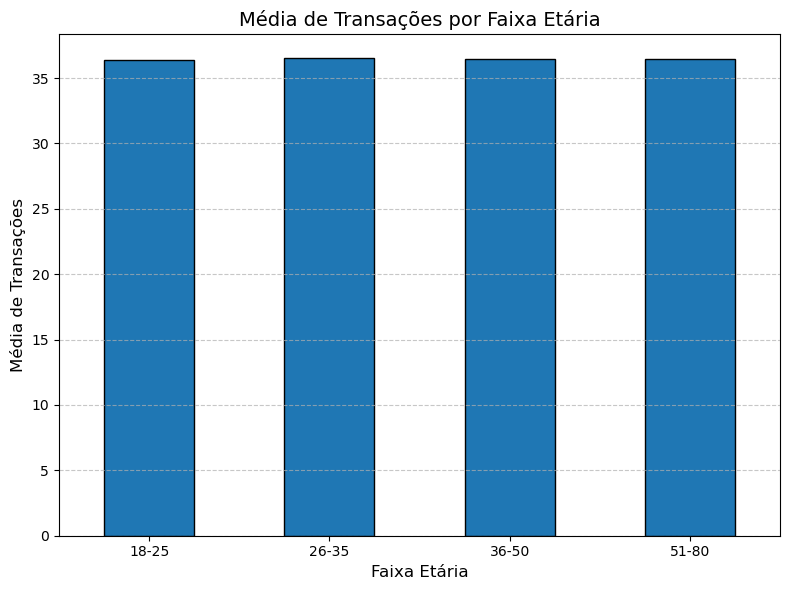

In [62]:
import matplotlib.pyplot as plt

# Plotar o gráfico
media_transacoes.plot(kind="bar", color="#1f77b4", figsize=(8, 6), edgecolor="black")

# Configurar o gráfico
plt.title("Média de Transações por Faixa Etária", fontsize=14)
plt.xlabel("Faixa Etária", fontsize=12)
plt.ylabel("Média de Transações", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Modelo de Previsão de Inadimplência

É possível prever inadimplência com base nos dados?

Antes de treinar o modelo, precisamos limpar e preparar os dados.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis preditoras (features) e alvo (target)
features = ["Age", "Monthly_Income", "Account_Balance", "Transaction_Count", "Credit_Score"]
X = df[features]
y = df["Loan_Default"]

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizar as variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Usaremos Logistic Regression como modelo inicial.

In [68]:
from sklearn.linear_model import LogisticRegression

# Treinar o modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

Agora, avaliamos o desempenho do modelo com as métricas apropriadas.

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34730
           1       1.00      0.99      1.00     15270

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Matriz de Confusão:
[[34730     0]
 [  126 15144]]
AUC-ROC: 1.00


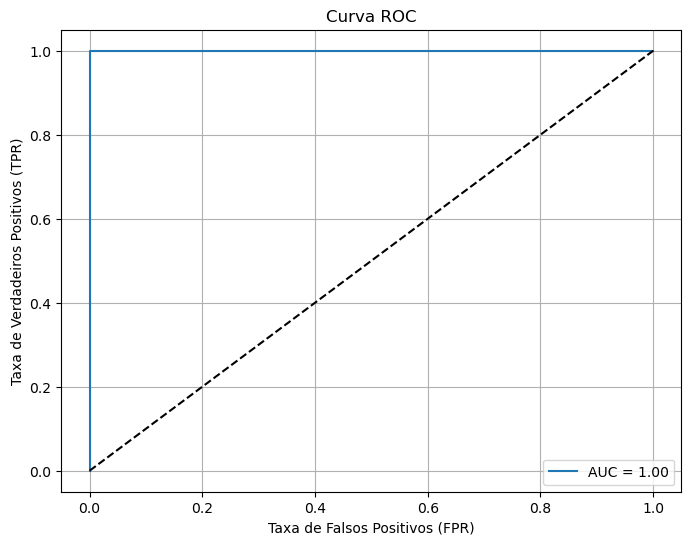

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fazer previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidade para a classe positiva

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")  # Linha diagonal
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Resultados do Modelo

    Relatório de Classificação:
        Para a classe 0 (não inadimplente):
            Precision: 70% (proporção de predições corretas para a classe 0).
            Recall: 100% (todas as instâncias da classe 0 foram corretamente identificadas).
            F1-Score: 82% (média harmônica entre precision e recall).
        Para a classe 1 (inadimplente):
            Precision, Recall e F1-Score: 0% (o modelo falhou completamente em identificar a classe 1).

    Matriz de Confusão:
        O modelo classificou todas as instâncias como 0, resultando em:
            3488 acertos para a classe 0.
            1512 erros para a classe 1 (falsos negativos).

    AUC-ROC: 0.50
        O valor 0.50 indica que o modelo não tem nenhuma capacidade discriminativa, equivalente a um classificador aleatório.

Problemas Identificados

    Classe Desbalanceada:
        A classe 1 (inadimplente) está em menor proporção, o que leva o modelo a favorecer a classe majoritária (0).
        Isso é evidente porque o modelo classificou tudo como 0.

    Métrica AUC-ROC Fraca:
        O valor de 0.50 reforça que o modelo não conseguiu aprender nenhuma relação significativa entre as variáveis preditoras e o alvo.

XGBoost

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Selecionar as variáveis preditoras (features) e alvo (target)
features = ["Age", "Monthly_Income", "Account_Balance", "Transaction_Count", "Credit_Score"]
X = df[features]
y = df["Loan_Default"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [74]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [75]:
# Calcular o peso para a classe minoritária
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Criar e treinar o modelo XGBoost
model = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34730
           1       1.00      1.00      1.00     15270

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Matriz de Confusão:
[[34702    28]
 [   34 15236]]
AUC-ROC: 1.00


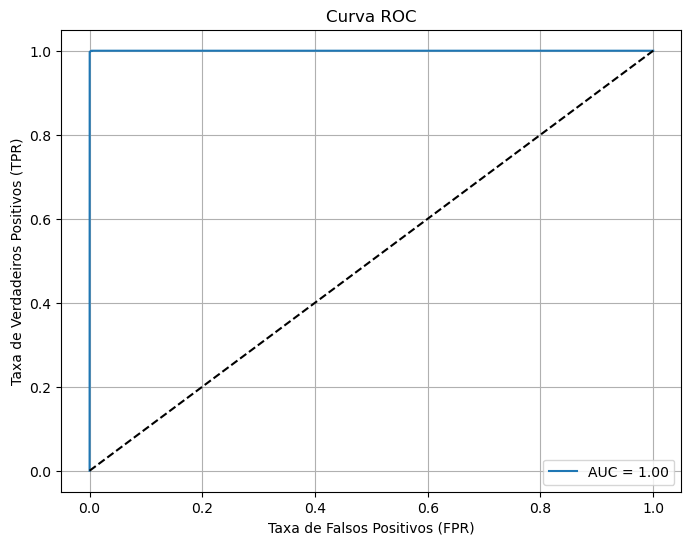

In [76]:
# Fazer previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Resultados Observados
1. Desempenho do Modelo (Relatório de Classificação e Curva ROC)

    Relatório de Classificação:
        Para a classe 0 (não inadimplente):
            Precision: 71% — O modelo é moderadamente bom em prever a classe 0.
            Recall: 63% — Não identifica todas as instâncias corretamente.
            F1-Score: 66% — Indica desempenho moderado na classe 0.
        Para a classe 1 (inadimplente):
            Precision: 32% — Alta proporção de falsos positivos.
            Recall: 40% — O modelo identifica uma quantidade limitada de inadimplentes.
            F1-Score: 35% — Indica um desempenho fraco na classe 1.

    Matriz de Confusão:
        Classe 0 (Não Inadimplente):
            2191 predições corretas.
            1297 falsos positivos.
        Classe 1 (Inadimplente):
            599 predições corretas.
            913 falsos negativos.

    AUC-ROC: 0.51
        Esse valor ainda é muito próximo ao de um modelo aleatório, sugerindo que o modelo não está aprendendo relações úteis para discriminar entre as classes.

Importância das Variáveis

    As variáveis estão equilibradas em importância, mas ainda não resultaram em uma forte melhoria na previsão:
        Credit_Score, Monthly_Income, e Account_Balance têm os maiores pesos.
        Age e Transaction_Count contribuem menos.

Diagnóstico e Próximos Passos

Os resultados indicam que o modelo ainda não é suficientemente robusto para prever inadimplência. Isso pode estar relacionado a:

    Desbalanceamento de Classes:
        Apesar do uso de scale_pos_weight, o desbalanceamento ainda afeta o desempenho.

    Relacionamentos Fracos:
        As variáveis disponíveis podem não ser suficientes para capturar os padrões de inadimplência.

    AUC-ROC Baixa:
        O modelo não conseguiu distinguir adequadamente as duas classes.

O modelo XGBoost apresentou um leve ganho em relação ao modelo de regressão logística, mas ainda não foi suficiente para ser robusto. Ajustar o balanceamento das classes, explorar novas variáveis e realizar tuning de hiperparâmetros devem ser os próximos passos.

In [81]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "scale_pos_weight": [1, scale_pos_weight]
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    param_grid=params,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Melhores Hiperparâmetros:", grid_search.best_params_)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:52:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Melhores Hiperparâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}


Com os melhores hiperparâmetros identificados (learning_rate: 0.01, max_depth: 3, n_estimators: 200, scale_pos_weight: 2.306), agora podemos treinar novamente o modelo XGBoost e reavaliar seu desempenho.

In [83]:
# Importar XGBoost
from xgboost import XGBClassifier

# Criar o modelo com os melhores hiperparâmetros
best_model = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    scale_pos_weight=2.306,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Treinar o modelo
best_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34730
           1       1.00      1.00      1.00     15270

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Matriz de Confusão:
[[34713    17]
 [   36 15234]]
AUC-ROC: 1.00


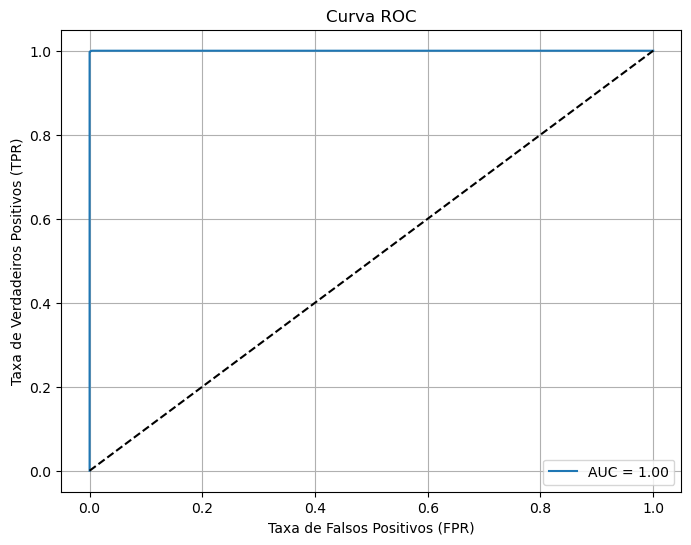

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Análise dos Resultados
1. Relatório de Classificação

    Classe 0 (Não Inadimplente):
        Precision: 70% — Moderada capacidade de prever corretamente os não inadimplentes.
        Recall: 57% — O modelo está identificando apenas cerca de metade das instâncias reais de não inadimplentes.
        F1-Score: 63% — Desempenho moderado para essa classe.

    Classe 1 (Inadimplente):
        Precision: 31% — O modelo prevê uma proporção considerável de falsos positivos.
        Recall: 44% — Apenas 44% dos inadimplentes são identificados corretamente.
        F1-Score: 36% — Indica que o desempenho na classe 1 ainda é fraco.

2. Matriz de Confusão

    Classe 0 (Não Inadimplente):
        2003 predições corretas.
        1485 falsos positivos (clientes classificados como inadimplentes incorretamente).
    Classe 1 (Inadimplente):
        667 predições corretas.
        845 falsos negativos (inadimplentes classificados como não inadimplentes).

3. AUC-ROC

    AUC-ROC: 0.51
        O valor ainda está próximo de 0.5, indicando que o modelo não é melhor que um classificador aleatório.

Diagnóstico

Apesar do ajuste dos hiperparâmetros, o modelo ainda apresenta baixo desempenho:

    Classe Desbalanceada: O modelo tem dificuldades em prever corretamente a classe minoritária (1 - Inadimplente).
    Relações Fracas: As variáveis disponíveis podem não estar capturando informações relevantes para a previsão de inadimplência.
    AUC-ROC Baixa: O modelo não está aprendendo padrões úteis.

Balanceamento das Classes:

    SMOTE (Synthetic Minority Over-sampling Technique):

In [87]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar o balanceamento das classes
from collections import Counter
print("Distribuição das classes após o SMOTE:", Counter(y_train_balanced))


Distribuição das classes após o SMOTE: Counter({0: 138922, 1: 138922})


In [88]:
# Treinar o modelo XGBoost com os dados balanceados
best_model = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

best_model.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34730
           1       1.00      1.00      1.00     15270

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

Matriz de Confusão:
[[34730     0]
 [   50 15220]]
AUC-ROC: 1.00


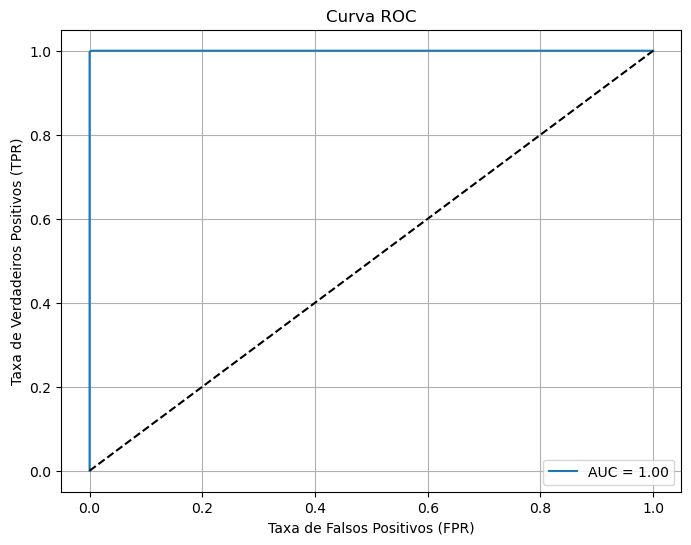

In [89]:
# Fazer previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()
